<a href="https://colab.research.google.com/github/dayoungcho/CAU_DL4AI/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[0.12621772]
 [1.5550243 ]
 [0.9380829 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.9986745 ]
 [0.8908396 ]
 [0.17959869]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.14279893],
       [-1.277493  ],
       [ 1.8501453 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [ ]:
print(a,b,c,d,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
print(result)

tf.Tensor(9.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

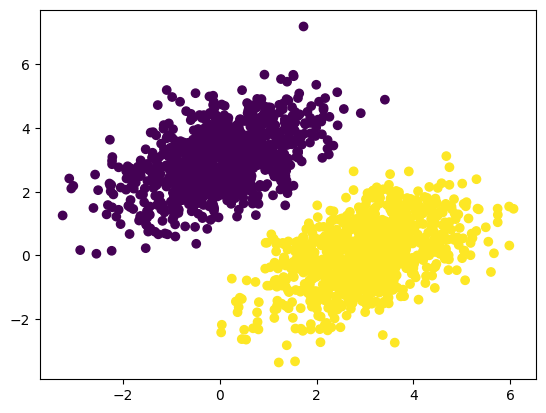

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.9316
Loss at step 1: 0.4491
Loss at step 2: 0.1678
Loss at step 3: 0.1256
Loss at step 4: 0.1134
Loss at step 5: 0.1055
Loss at step 6: 0.0986
Loss at step 7: 0.0924
Loss at step 8: 0.0867
Loss at step 9: 0.0814
Loss at step 10: 0.0766
Loss at step 11: 0.0722
Loss at step 12: 0.0682
Loss at step 13: 0.0645
Loss at step 14: 0.0611
Loss at step 15: 0.0580
Loss at step 16: 0.0552
Loss at step 17: 0.0526
Loss at step 18: 0.0502
Loss at step 19: 0.0480
Loss at step 20: 0.0460
Loss at step 21: 0.0442
Loss at step 22: 0.0425
Loss at step 23: 0.0410
Loss at step 24: 0.0396
Loss at step 25: 0.0383
Loss at step 26: 0.0371
Loss at step 27: 0.0360
Loss at step 28: 0.0350
Loss at step 29: 0.0341
Loss at step 30: 0.0333
Loss at step 31: 0.0325
Loss at step 32: 0.0318
Loss at step 33: 0.0312
Loss at step 34: 0.0306
Loss at step 35: 0.0301
Loss at step 36: 0.0296
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0283


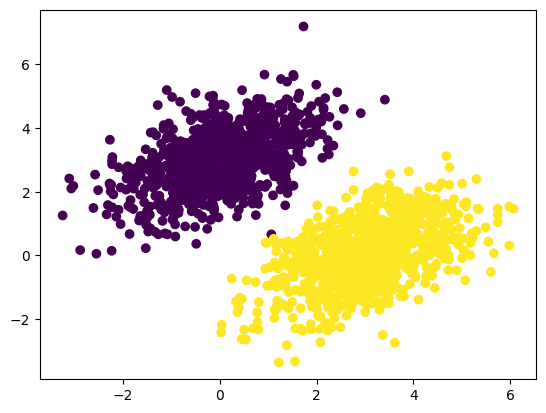

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

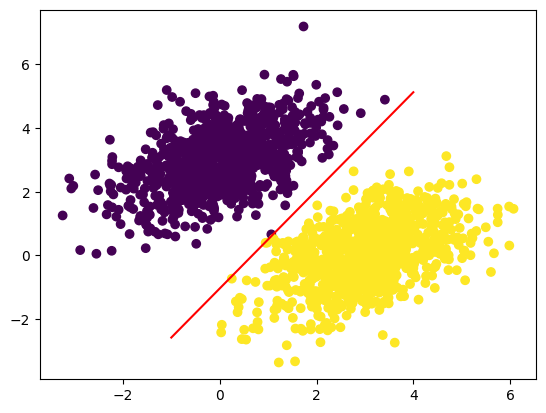

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 4s 4ms/step - loss: 0.6281 - binary_accuracy: 0.9965
Epoch 2/5
16/16 [==============================] - 0s 5ms/step - loss: 0.5434 - binary_accuracy: 0.9965
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4770 - binary_accuracy: 0.9965
Epoch 4/5
16/16 [==============================] - 0s 5ms/step - loss: 0.4173 - binary_accuracy: 0.9965
Epoch 5/5
16/16 [==============================] - 0s 7ms/step - loss: 0.3629 - binary_accuracy: 0.9945


In [ ]:
history.history

{'loss': [0.6281219720840454,
  0.5434146523475647,
  0.4769922196865082,
  0.4173227846622467,
  0.3628741204738617],
 'binary_accuracy': [0.9965000152587891,
  0.9965000152587891,
  0.9965000152587891,
  0.9965000152587891,
  0.9944999814033508]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.1739 - binary_accuracy: 0.9707 - val_loss: 0.0829 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0745 - binary_accuracy: 0.9579 - val_loss: 0.0365 - val_binary_accuracy: 0.9933
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0666 - binary_accuracy: 0.9664 - val_loss: 0.0316 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0688 - binary_accuracy: 0.9600 - val_loss: 0.0383 - val_binary_accuracy: 0.9950
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0724 - binary_accuracy: 0.9614 - val_loss: 0.1472 - val_binary_accuracy: 0.9567


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 1.2041923 ]
 [ 1.2107265 ]
 [ 1.014559  ]
 [ 1.582011  ]
 [ 1.7338915 ]
 [ 1.5640106 ]
 [ 1.3709209 ]
 [-0.01897901]
 [ 0.12807393]
 [-0.03064752]]


## Summary

# Chapter4

## Getting started with neural networks: Classification and regression

### 4-1. Classifying movie reviews: A binary classification example

#### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])   # i-3은 이 데이터에만 뭐 적용되는 어쩌구..rule..

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
for i in range(10):
  print(len(train_data[i]))   # 길이가 다 다름

218
189
141
550
147
43
123
562
233
130


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_train.shape)
print(x_test.shape)

25000
218
25000
(25000, 10000)
(25000, 10000)


In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # binary classification
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.5143 - accuracy: 0.7824 - val_loss: 0.3794 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3109 - accuracy: 0.8943 - val_loss: 0.3026 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2300 - accuracy: 0.9231 - val_loss: 0.3046 - val_accuracy: 0.8765
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1844 - accuracy: 0.9393 - val_loss: 0.2737 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1546 - accuracy: 0.9500 - val_loss: 0.2794 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1301 - accuracy: 0.9580 - val_loss: 0.3084 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.3099 - val_accuracy: 0.8797
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
for i in range(20):
  print('<epoch {0}> loss: {1:.4f}, accuracy: {2:.4f}, val_loss: {3:.4f}, val_accuracy: {4:.4f}'.format(i, history_dict['loss'][i], history_dict['accuracy'][i], history_dict['val_loss'][i], history_dict['val_accuracy'][i]))

<epoch 0> loss: 0.5143, accuracy: 0.7824, val_loss: 0.3794, val_accuracy: 0.8650
<epoch 1> loss: 0.3109, accuracy: 0.8943, val_loss: 0.3026, val_accuracy: 0.8835
<epoch 2> loss: 0.2300, accuracy: 0.9231, val_loss: 0.3046, val_accuracy: 0.8765
<epoch 3> loss: 0.1844, accuracy: 0.9393, val_loss: 0.2737, val_accuracy: 0.8881
<epoch 4> loss: 0.1546, accuracy: 0.9500, val_loss: 0.2794, val_accuracy: 0.8854
<epoch 5> loss: 0.1301, accuracy: 0.9580, val_loss: 0.3084, val_accuracy: 0.8820
<epoch 6> loss: 0.1090, accuracy: 0.9661, val_loss: 0.3099, val_accuracy: 0.8797
<epoch 7> loss: 0.0944, accuracy: 0.9718, val_loss: 0.3436, val_accuracy: 0.8778
<epoch 8> loss: 0.0806, accuracy: 0.9769, val_loss: 0.3629, val_accuracy: 0.8777
<epoch 9> loss: 0.0674, accuracy: 0.9823, val_loss: 0.3532, val_accuracy: 0.8793
<epoch 10> loss: 0.0538, accuracy: 0.9877, val_loss: 0.4637, val_accuracy: 0.8535
<epoch 11> loss: 0.0496, accuracy: 0.9883, val_loss: 0.4060, val_accuracy: 0.8759
<epoch 12> loss: 0.0418, a

**Plotting the training and validation loss**

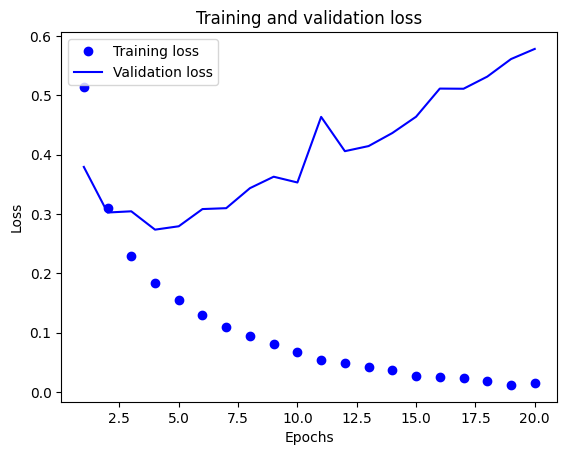

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

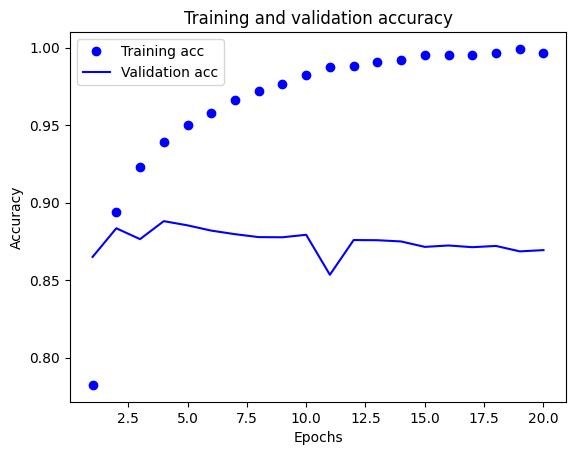

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4906 - accuracy: 0.8132
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2900 - accuracy: 0.8965
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2257 - accuracy: 0.9196
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2813 - accuracy: 0.8873


In [ ]:
results

[0.2812943756580353, 0.8872799873352051]

#### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2218192 ],
       [0.9989901 ],
       [0.75936466],
       ...,
       [0.08696396],
       [0.08226186],
       [0.43350044]], dtype=float32)

#### Further experiments

In [ ]:
logistic_model = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])

logistic_model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

history_logistic = logistic_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 69ms/step - loss: 0.2134 - accuracy: 0.7391 - val_loss: 0.1896 - val_accuracy: 0.8070
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1702 - accuracy: 0.8446 - val_loss: 0.1627 - val_accuracy: 0.8399
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1453 - accuracy: 0.8701 - val_loss: 0.1446 - val_accuracy: 0.8579
Epoch 4/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1279 - accuracy: 0.8846 - val_loss: 0.1321 - val_accuracy: 0.8655
Epoch 5/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1152 - accuracy: 0.8953 - val_loss: 0.1230 - val_accuracy: 0.8736
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1055 - accuracy: 0.9030 - val_loss: 0.1164 - val_accuracy: 0.8758
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0977 - accuracy: 0.9103 - val_loss: 0.1108 - val_accuracy: 0.8802
Epoch 8/10
30

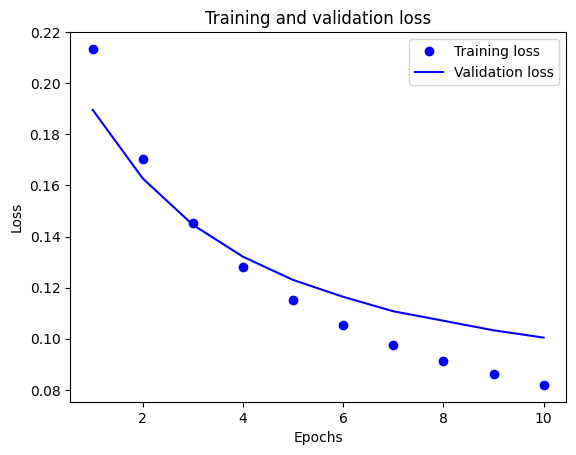

In [ ]:
history_dict2 = history_logistic.history
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

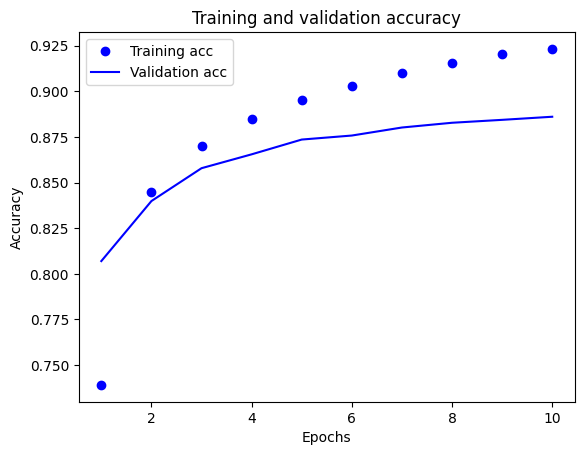

In [ ]:
plt.clf()
acc = history_dict2["accuracy"]
val_acc = history_dict2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model2 = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/10
30/30 [==============================] - 3s 65ms/step - loss: 0.1802 - accuracy: 0.7459 - val_loss: 0.1223 - val_accuracy: 0.8535
Epoch 2/10
30/30 [==============================] - 1s 22ms/step - loss: 0.0973 - accuracy: 0.8880 - val_loss: 0.0949 - val_accuracy: 0.8813
Epoch 3/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0719 - accuracy: 0.9170 - val_loss: 0.0886 - val_accuracy: 0.8828
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0580 - accuracy: 0.9321 - val_loss: 0.0841 - val_accuracy: 0.8861
Epoch 5/10
30/30 [==============================] - 1s 23ms/step - loss: 0.0487 - accuracy: 0.9441 - val_loss: 0.0837 - val_accuracy: 0.8856
Epoch 6/10
30/30 [==============================] - 1s 23ms/step - loss: 0.0412 - accuracy: 0.9540 - val_loss: 0.1037 - val_accuracy: 0.8631
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0364 - accuracy: 0.9607 - val_loss: 0.0856 - val_accuracy: 0.8833
Epoch 8/10
30

In [ ]:
model3 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#### Wrapping up

### 4-2. Classifying newswires: A multiclass classification example

#### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

#### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#### Building your model

**Model definition**

In [ ]:
y_train.shape

(8982, 46)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # output length 46
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.9294 - accuracy: 0.4785 - val_loss: 1.9713 - val_accuracy: 0.6140
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.6137 - accuracy: 0.6723 - val_loss: 1.3924 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2001 - accuracy: 0.7427 - val_loss: 1.1928 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9781 - accuracy: 0.7873 - val_loss: 1.0947 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8155 - accuracy: 0.8237 - val_loss: 1.0116 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6842 - accuracy: 0.8524 - val_loss: 0.9648 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5790 - accuracy: 0.8781 - val_loss: 0.9149 - val_accuracy: 0.8060
Epoch 8/20
16

**Plotting the training and validation loss**

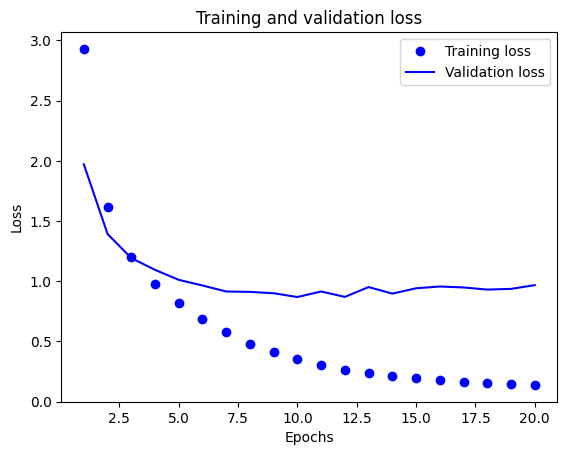

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

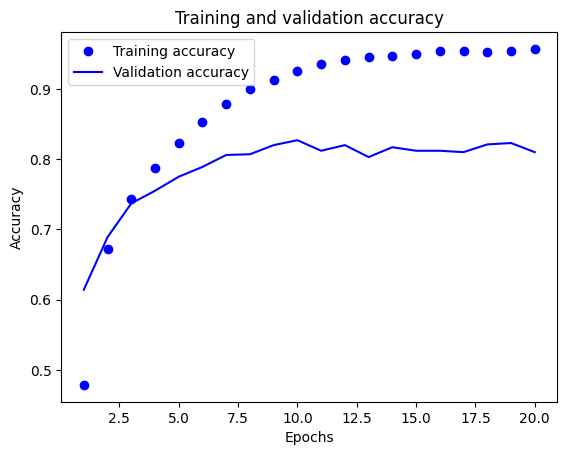

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 18ms/step - loss: 2.5552 - accuracy: 0.5173
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.4568 - accuracy: 0.6921
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1202 - accuracy: 0.7558
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9076 - accuracy: 0.8029
Epoch 5/9
18/18 [==============================] - 0s 19ms/step - loss: 0.7479 - accuracy: 0.8388
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6189 - accuracy: 0.8692
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5162 - accuracy: 0.8930
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4289 - accuracy: 0.9109
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.7890


In [ ]:
results

[0.9181857109069824, 0.7889581322669983]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19323241317898487

#### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

#### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",     # label을 다른 형식으로 convert하지 않앗으므로 sparse_categorical_crossentropy 사용해도 됨
              metrics=["accuracy"])

#### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")   # not recommended structure
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))    # 모델 성능 상대적으로 bad..

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.6682 - accuracy: 0.3768 - val_loss: 1.9194 - val_accuracy: 0.5970
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 1.6458 - accuracy: 0.6409 - val_loss: 1.5427 - val_accuracy: 0.6550
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3338 - accuracy: 0.6917 - val_loss: 1.3839 - val_accuracy: 0.6780
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1597 - accuracy: 0.7136 - val_loss: 1.3145 - val_accuracy: 0.6760
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0448 - accuracy: 0.7298 - val_loss: 1.2732 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9559 - accuracy: 0.7443 - val_loss: 1.2528 - val_accuracy: 0.7080
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8816 - accuracy: 0.7679 - val_loss: 1.2777 - val_accuracy: 0.7100
Epoch 8/20
63/63 [

#### Further experiments

### Wrapping up